In [129]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
device = 'cuda:0'
torch.manual_seed(0)
torch.cuda.is_available()

True

In [159]:
# Hyperparameter
para = {
    "order": 3
}

In [226]:
# Model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 100),
            nn.Sigmoid(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.model(x)

In [227]:
# Data
np.random.seed(42)
x_train = np.random.rand(1000, 1) * 1 + 0.95
# y_train = x_train ** para["order"] + np.random.randn(100, 1) * 2
y_train = (1 / x_train) ** 12 - (1 / x_train) ** 6

x_train = torch.FloatTensor(x_train)
y_train = torch.FloatTensor(y_train)

x_test = np.random.rand(1000, 1) * 1 + 0.95
# y_test = x_test ** para["order"] + np.random.randn(100, 1) * 2
y_test = 1 / x_test ** 12 - 1 / x_test ** 6

x_test = torch.FloatTensor(x_test)
y_test = torch.FloatTensor(y_test)

In [238]:
# Train
model = SimpleNet()
criterion = nn.MSELoss()
# optimizer = optim.SGD(model.parameters(), lr=0.00001, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100000
for epoch in range(num_epochs):
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.10f}')

Epoch [1000/100000], Loss: 0.0099018989
Epoch [2000/100000], Loss: 0.0097730840
Epoch [3000/100000], Loss: 0.0094133783
Epoch [4000/100000], Loss: 0.0079428311
Epoch [5000/100000], Loss: 0.0057638176
Epoch [6000/100000], Loss: 0.0036324025
Epoch [7000/100000], Loss: 0.0023457350
Epoch [8000/100000], Loss: 0.0017262049
Epoch [9000/100000], Loss: 0.0013716395
Epoch [10000/100000], Loss: 0.0011259957
Epoch [11000/100000], Loss: 0.0009400742
Epoch [12000/100000], Loss: 0.0007942141
Epoch [13000/100000], Loss: 0.0006763039
Epoch [14000/100000], Loss: 0.0005799046
Epoch [15000/100000], Loss: 0.0005007598
Epoch [16000/100000], Loss: 0.0004352669
Epoch [17000/100000], Loss: 0.0003818960
Epoch [18000/100000], Loss: 0.0003371965
Epoch [19000/100000], Loss: 0.0003004898
Epoch [20000/100000], Loss: 0.0002715224
Epoch [21000/100000], Loss: 0.0002451675
Epoch [22000/100000], Loss: 0.0002677388
Epoch [23000/100000], Loss: 0.0002068999
Epoch [24000/100000], Loss: 0.0001922035
Epoch [25000/100000], Los

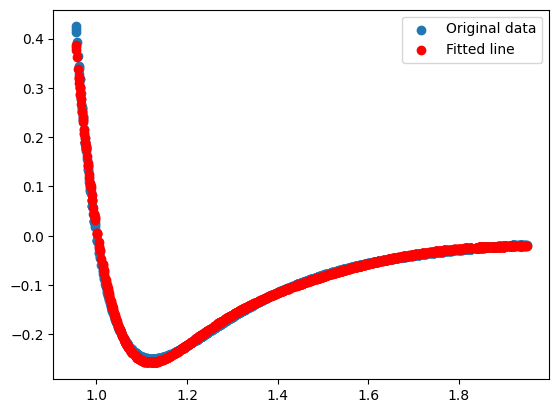

In [239]:
# Validate
with torch.no_grad():
    predicted = model(x_train).numpy()

plt.scatter(x_train.numpy(), y_train.numpy(), label='Original data')
plt.scatter(x_train.numpy(), predicted, label='Fitted line', color='red')
plt.legend()
plt.show()

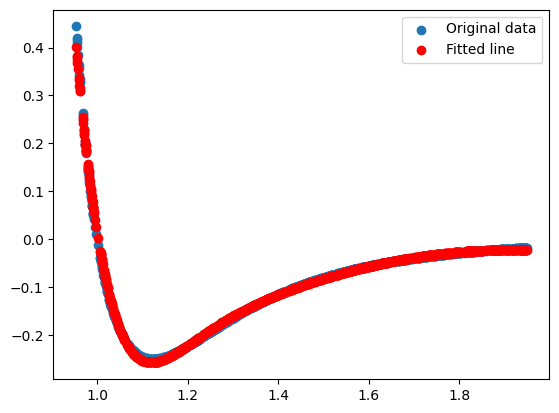

In [240]:
# Test
with torch.no_grad():
    predicted = model(x_test).numpy()

plt.scatter(x_test.numpy(), y_test.numpy(), label='Original data')
plt.scatter(x_test.numpy(), predicted, label='Fitted line', color='red')
plt.legend()
plt.show()